<br>

### Exercício: Regressão Linear:
__Parte 1:__

1- Usando a função getData(), carregue os dados disponibilizados.

2- Separe parte dos dados para o dataset de teste.

3- Usando a metodologia de validação cruzada, teste diferentes parâmetros da regLinear - diferentes learning_rates e num_steps - para escolher a melhor combinação de parâmetros.

4- Implemente a regressão linear do scikit-learn e compare os resultados obtidos.

__Parte 2 (Introdução):__

Para cada variável explicativa $X_1, .., X_5$, crie outras variáveis usando o __quadrado__ de cada um delas. Desta forma, o conjunto final será de 10 variáveis, em que:

$X_6 = (X_1)^{2}$, $X_7 = (X_2)^{2}$, $X_8 = (X_3)^{2}$, $X_9 = (X_4)^{2}$, $X_{10} = (X_5)^{2}$.

Ao treinarmos uma regressão linear com essas 10 variáveis, a predição é da forma:

$y_{pred} = \theta_0 + \theta_1 \cdot X_1 + .. + \theta_5 \cdot X_5 + \theta_6 \cdot (X_1)^{2} + .. + \theta_{10} \cdot (X_5)^{2}$

Como estamos usando o quadrado das variáveis explicativas, dizemos que temos um __modelo de regressão polinomial de grau 2__. Podemos ter variações deste modelo:

-Podemos aumentar o grau: basta mudar a potência que elevamos as variáveis. Por exemplo, podemos incluir o __cubo__ das variáveis e termos um modelo polinomial de ordem 3.

-Podemos ter __interações__ entre as variáveis: multiplicações entre as variáveis.

Exemplo:

$y_{pred} = \theta_0 + \theta_1 \cdot X_1 + .. + \theta_5 \cdot X_5 + \theta_6 \cdot (X_1)^{2} + .. + \theta_{10} \cdot (X_5)^{2} + \theta_{11} \cdot (X_1)^{3} + \theta_{12} \cdot V1 + \theta_{13} \cdot V2$,

onde

$V_1 = X_1 \cdot X_2$ e $V_2 = (X_2)^{2} \cdot X_4$

__Parte 2 (Exercício):__

1- Estude o link:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

em que é discutido como criar modelos polinomiais com o scikit-learn de forma detalhada.

2- Repita os passos da primeira parte, mas agora considerando polinômios de graus 2 ou mais.

3- Inclua regularização Ridge e Lasso nas análises e teste os resultados para diferentes parâmetros $\alpha$.

<br>


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_friedman1, make_classification

In [2]:
#função para acessar os dados do exercício 1

def getData():
    X, y = make_friedman1(n_samples = 10000, n_features = 5, noise = 5.0, random_state = 0)
    return X, y

In [3]:
#classe regLinear para exercício

class regLinear():
    
    def __init__(self, learning_rate, num_steps):
        self.learning_rate = learning_rate
        self.num_steps = num_steps
        
    def fit(self, X, y,print_info=False):
        y = y.reshape(-1,1)
        m = X.shape[0] 
        k = X.shape[1] 
        theta = np.random.randn(k+1,1) 
        X_b = np.c_[np.ones((m, 1)), X] 
        for step in range(self.num_steps):
            gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
            theta = theta - self.learning_rate * gradients
        self.theta_final = theta
        if print_info:
            print("modelo treinado.")
                    
    def predict(self, X):
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]
        preds = X_b.dot(self.theta_final)
        return preds.reshape(-1,)

In [4]:
#função para acessar os dados do exercício 2

def getData2():
    X, y = make_classification(n_classes=2, n_features=5, n_samples=10000, random_state = 0)
    return X, y

In [5]:
X, y = getData()

In [6]:
print (X.shape)
print (y.shape)

(10000, 5)
(10000,)


In [7]:
# separação dados em treino e teste

Xtrain = X[:8000]
Xtest = X[8000:]
ytrain = y[:8000]
ytest = y[8000:]

In [8]:
print (Xtrain.shape)
print (ytrain.shape)
print (Xtest.shape)
print (ytest.shape)

(8000, 5)
(8000,)
(2000, 5)
(2000,)


In [9]:
import matplotlib.pyplot as plt

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
from sklearn.model_selection import KFold

In [14]:
# função para efetuar teste de validação cruzada manual, para modelos de regressão linear

def validacao_cruzada_mods_reglin (classificador,nome_classificador, X, y, n_folds,
                                   metrica, nome_metrica, print_res=True):

    metricas_treino, metricas_val = [],[]
    kf = KFold(n_splits=n_folds)
    for ind_treino, ind_val in kf.split(X, y):
        Xtrain_folds = X[ind_treino]
        ytrain_folds = y[ind_treino]
        Xval_folds = X[ind_val]
        yval_folds = y[ind_val]
        
        classificador.fit(Xtrain_folds, ytrain_folds)
          
        metricas_treino.append(metrica(y_true = ytrain_folds, y_pred = classificador.predict(Xtrain_folds)))
        metricas_val.append(metrica(y_true = yval_folds, y_pred = classificador.predict(Xval_folds)))
    
    if print_res:
        print ("Modelo: ", nome_classificador)
        print ("Métrica: ", nome_metrica)
        print ("Média treino: ", np.mean(metricas_treino))
        print ("Média validação: ", np.mean(metricas_val))
        
    else:
        return np.mean(metricas_treino), np.mean(metricas_val)

In [15]:
# esta função plota algumas curvas de desempenho dos modelos de regressão linear utilizando a métrica MSE, a partir de
#  intervalos de valores dados para Learning Rate e para Steps, dentro do algoritmo do gradiente descendente.

def compara_modelos_reglin (lrts_ini, lrts_fin, num_lrts, step_ini, step_fin, num_steps, X_comp, titulo, plot_val=False):
    
    if plot_val:
        lista_cores = ['b','g','r','c','m']
        if num_lrts>5:
            num_lrts=5
        
    lista_lrts = np.linspace(lrts_ini, lrts_fin, num_lrts)
    lista_steps = np.linspace(step_ini, step_fin, num_steps,dtype=int)
    mse_min=10000
    plt.figure(figsize=[30,15])
    
    i=0
    for lrts in lista_lrts:
        metricas_treino, metricas_val = [],[]

        for steps in lista_steps:
            mse_treino, mse_val = validacao_cruzada_mods_reglin (classificador=regLinear(lrts, steps),
                                    nome_classificador = "Regressão Linear", X=X_comp,
                                    y = ytrain, n_folds = 5, metrica = mean_squared_error,
                                    nome_metrica = "MSE", print_res=False)
            metricas_treino.append(mse_treino)
            metricas_val.append(mse_val)

        if plot_val:
            cor = lista_cores[i]
            plt.plot(lista_steps, metricas_treino, lw=2,c=cor, label="Learning rate teste: "+str(round(lrts,6)))
            plt.plot(lista_steps, metricas_val,"--",c=cor,label="Learning rate validação")
        else:    
            plt.plot(lista_steps, metricas_treino, lw=2, label="Learning rate teste: "+str(round(lrts,6)))
            
        if np.min(metricas_treino)<mse_min:
            mse_min=np.min(metricas_treino)
        i+=1
        
    plt.legend(fontsize=20)
    plt.ylabel("MSE",fontsize=20)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.xlabel("STEPS",fontsize=15)
    
    plt.grid()
    plt.title(titulo + " | MSE mínimo: "+str(round(mse_min,6)),
              fontsize=30, fontweight="bold")
    plt.show()

In [16]:
# esta função gera um relatório com as métricas do modelo de regressão escolhido, em treino, validação e teste, adotando
# o algoritmo definido manualmente na função e também com o modelo nativo da biblitoeca ScikitLearn, para efeitos de comparação
# os parâmetros de entrada são o título, a learning rate e num_steps escolhidos, e os datasets de treino e teste com as features
# já transformadas

def relatorio_reglin(titulo, learnrt, steps, Xtreino, Xteste):
    print(titulo)
    print()
    validacao_cruzada_mods_reglin (classificador=regLinear(learnrt, steps),
                                    nome_classificador = "Regressão Linear", X=Xtreino,
                                    y = ytrain, n_folds = 5, metrica = mean_squared_error, nome_metrica = "MSE", print_res=True)

    rl=regLinear(learnrt, steps)
    rl.fit(Xtreino, ytrain)
    mse_teste= mean_squared_error(y_true = ytest, y_pred=rl.predict(Xteste))
    print ("MSE do modelo em teste: ", mse_teste)
    print()

    linreg=LinearRegression()
    validacao_cruzada_mods_reglin (classificador=linreg,
                                    nome_classificador = "Regressão Linear - ScikitLearn", X=Xtreino,
                                    y = ytrain, n_folds = 5, metrica = mean_squared_error, nome_metrica = "MSE", print_res=True)

    mse_teste1 = mean_squared_error(y_true = ytest, y_pred=linreg.predict(Xteste))
    print ("MSE do modelo em teste: ", mse_teste1)

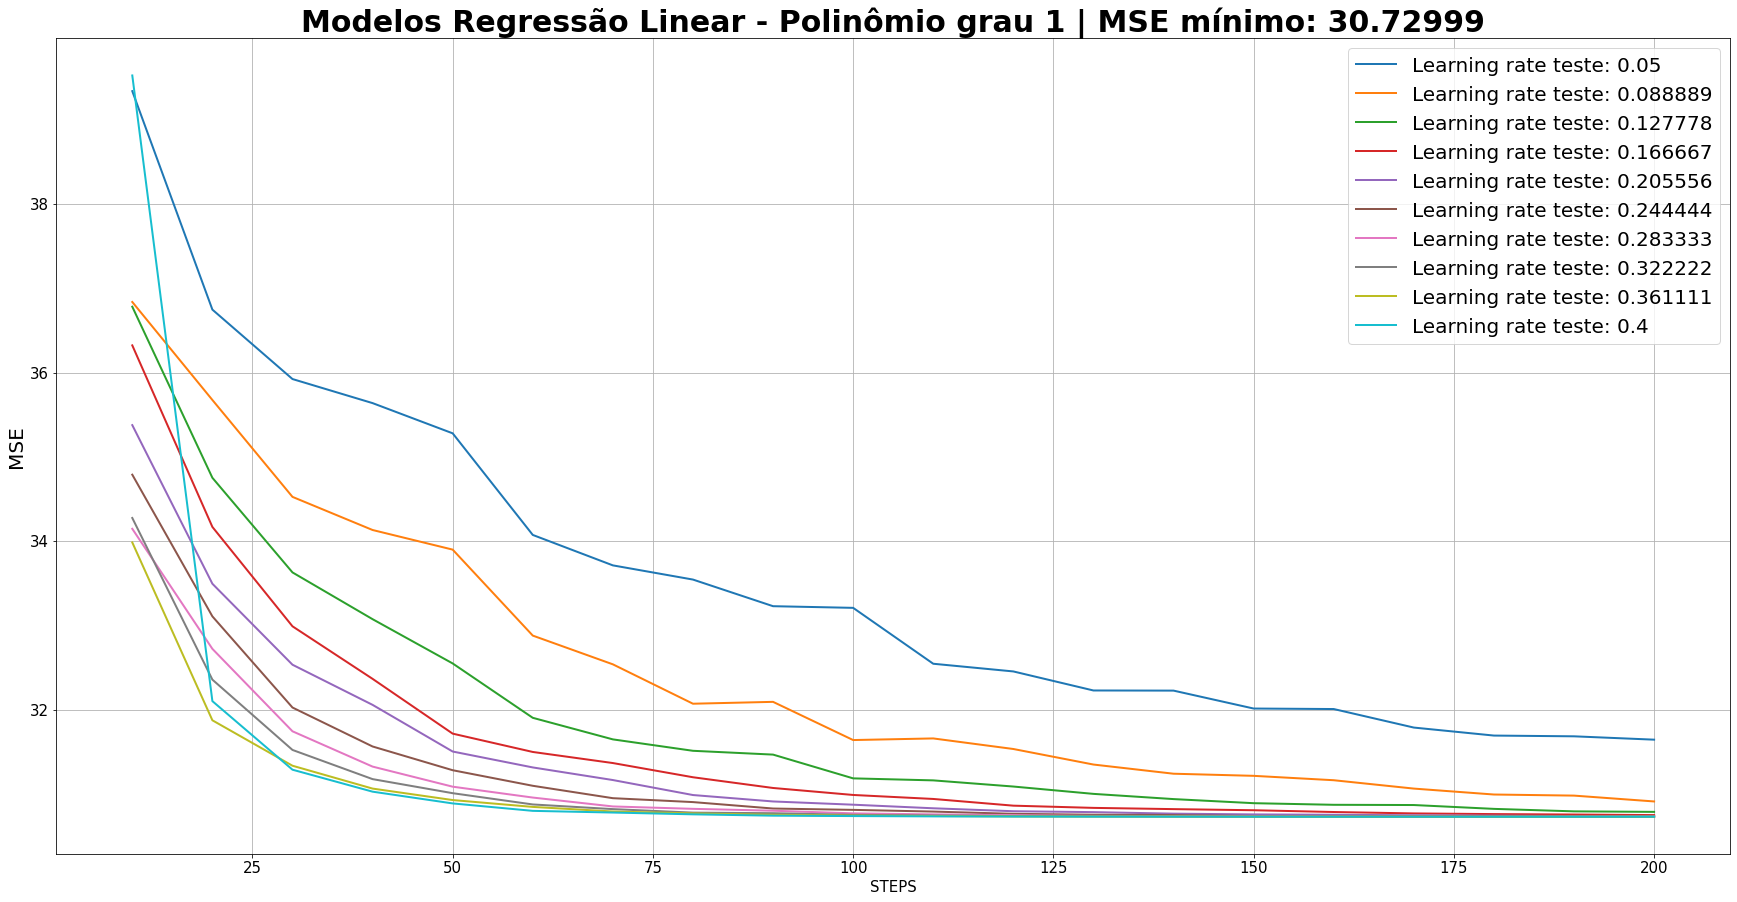

In [17]:
compara_modelos_reglin (lrts_ini=0.05, lrts_fin=0.4, num_lrts=10,
                        step_ini=10, step_fin=200, num_steps=20, X_comp=Xtrain,
                        titulo="Modelos Regressão Linear - Polinômio grau 1")

Observando as curvas, os valores de MSE tendem a convergir para valores próximos do MSE mínimo calculado nestas faixas de valores que é em torno de 30,73.
A escolha dos parâmetros a serem utilizados no modelo levará em consideração uma Learning Rate mais alta possível (conquanto gere estabilidade nos resultados) e Num_steps o menor possível, de modo a reduzir a necessidade de iterações para chegar a um valor satisfatório.
As faixas de valores dentro das quais o MSE parece convergir são para Learning rate entre 0.12 e 0.4 (em simulações observou-se que taxas acima de 0.43 trazem erros significativos ao modelo) e Num_steps entre 100 e 200


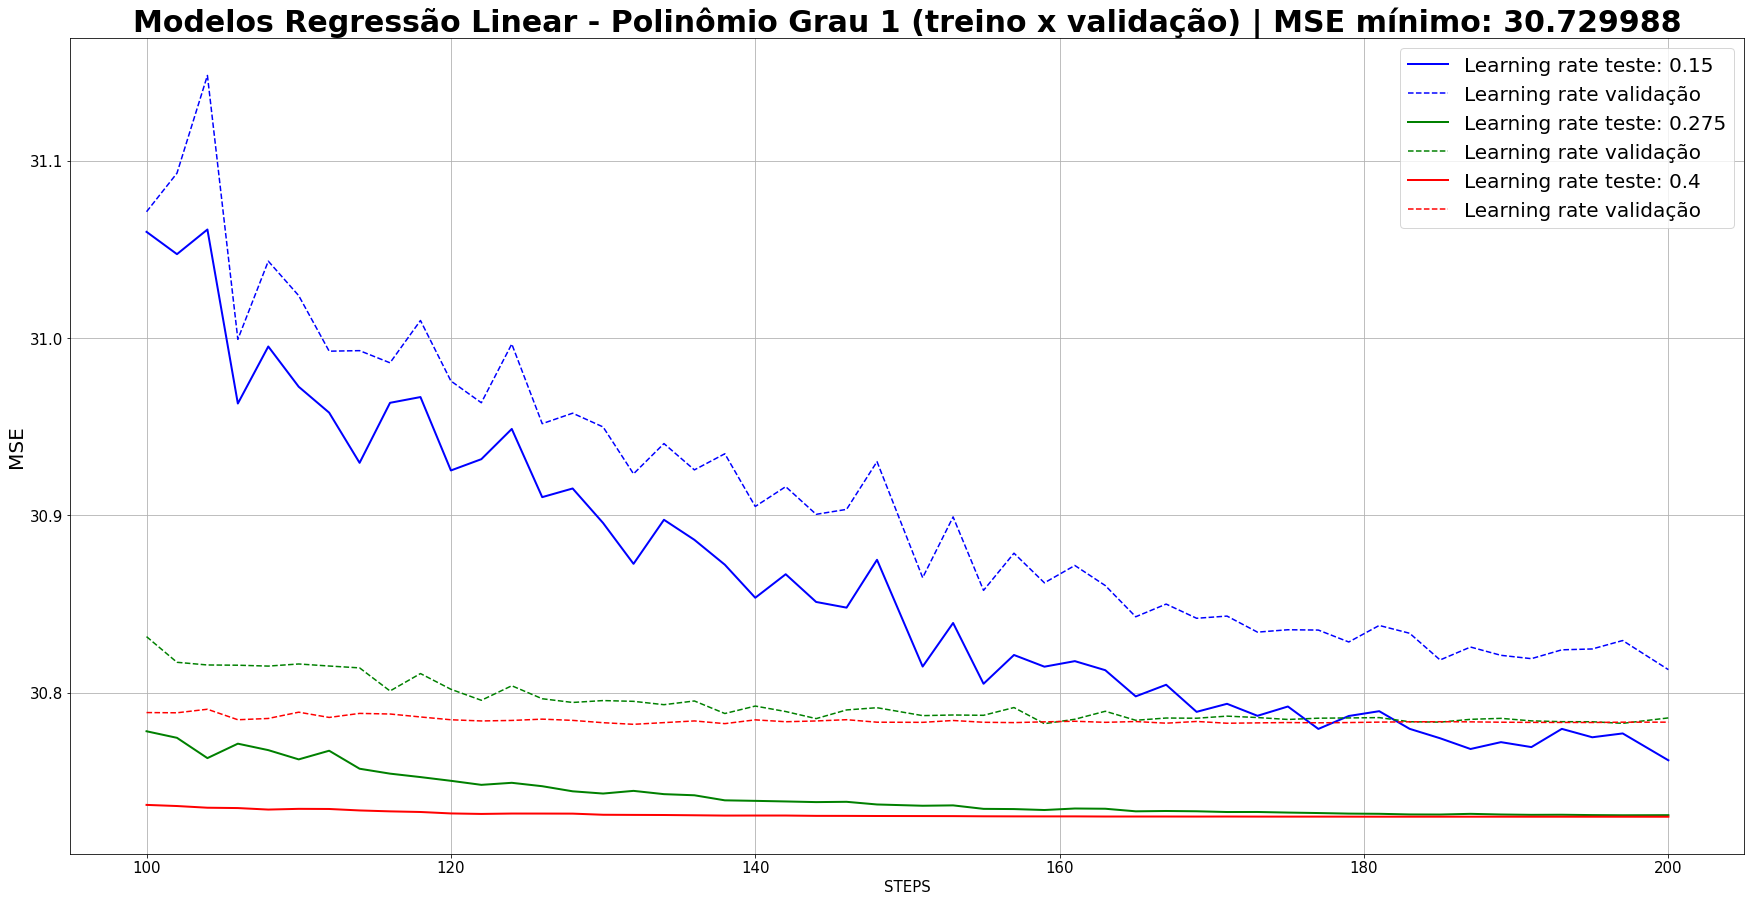

In [18]:
compara_modelos_reglin (lrts_ini=0.15, lrts_fin=0.4, num_lrts=3,
                        step_ini=100, step_fin=200, num_steps=50, X_comp=Xtrain,
                        titulo="Modelos Regressão Linear - Polinômio Grau 1 (treino x validação)", plot_val=True)

Adotaremos os parâmetros para Learning rate=0.4 e num_steps=200, por encontrarem-se numa faixa de valores com MSE baixo e pouco oscilante.

In [19]:
relatorio_reglin ("REGRESSÃO SIMPLES", 0.4, 200, Xtrain, Xtest)

REGRESSÃO SIMPLES

Modelo:  Regressão Linear
Métrica:  MSE
Média treino:  30.729994865333346
Média validação:  30.78319721006303
MSE do modelo em teste:  31.13161907590077

Modelo:  Regressão Linear - ScikitLearn
Métrica:  MSE
Média treino:  30.72997000089406
Média validação:  30.783370699767737
MSE do modelo em teste:  31.11247185875805


As métricas obtidas a partir do modelo de aprendizado implementado manualmente foram muito parecidas com as retornadas pelo modelo utilizado da biblioteca.
Também, em ambos os casos, as métricas em treino, validação e teste mostraram-se consistentes entre si.

Vamos testar outros modelos acrescentando variáveis polinomiais

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly=PolynomialFeatures(degree=2,include_bias=False)

In [22]:
Xtrain_poly = poly.fit_transform(Xtrain)
Xtest_poly = poly.fit_transform(Xtest)

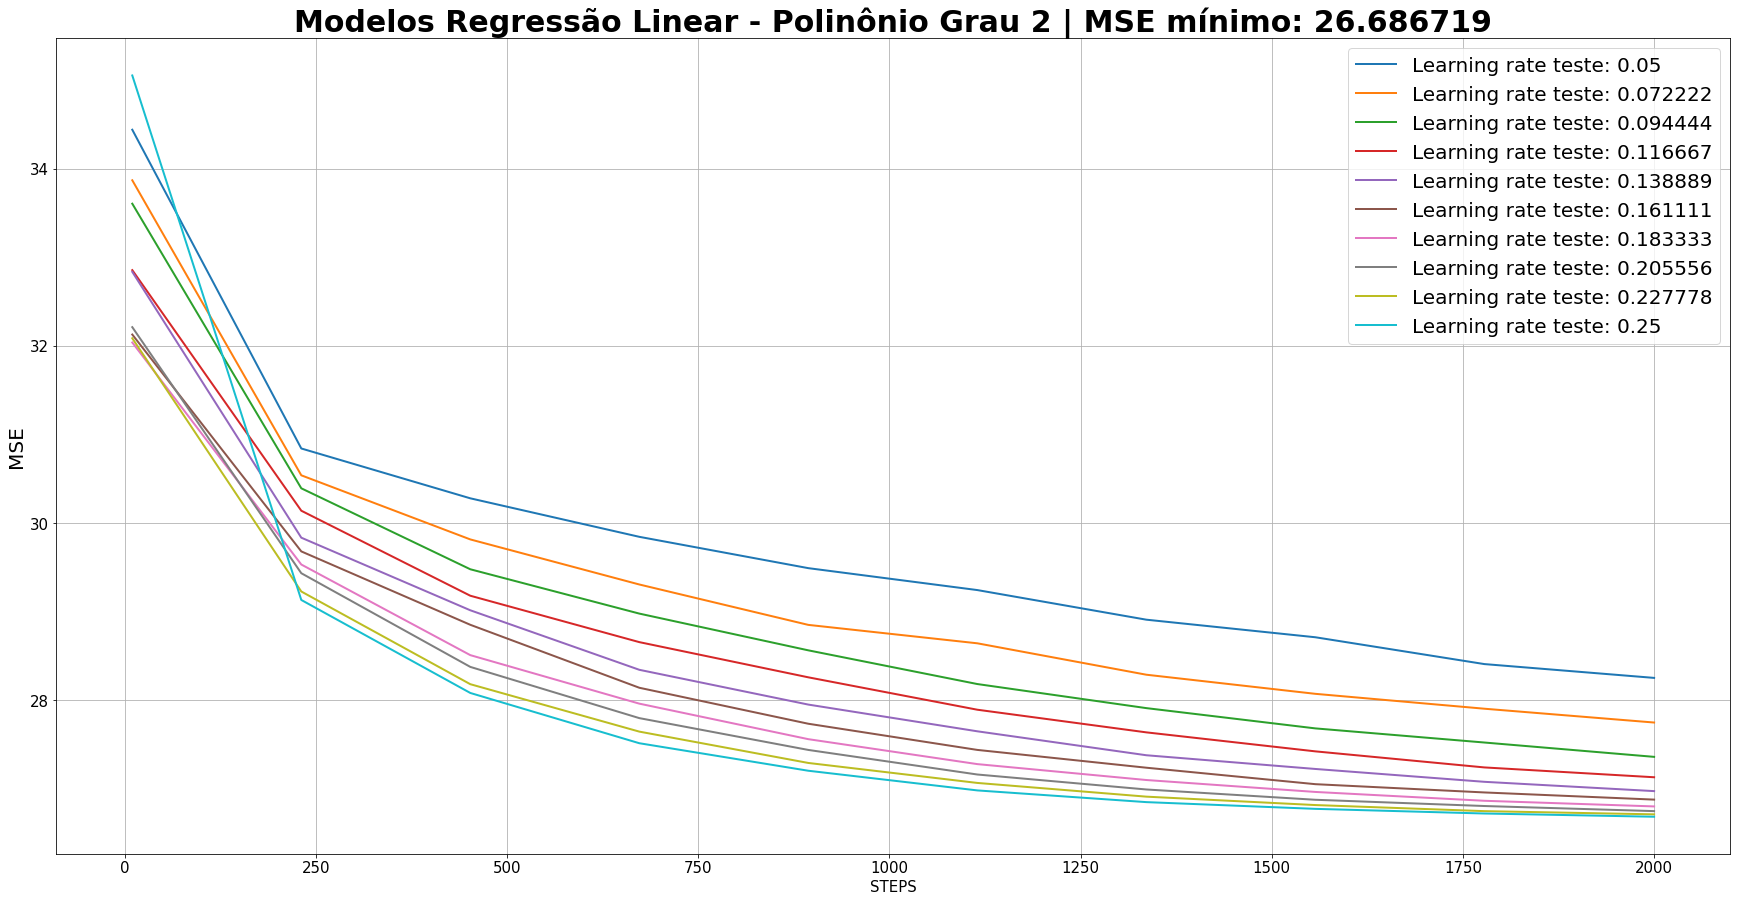

In [23]:
compara_modelos_reglin (lrts_ini=0.05, lrts_fin=0.25, num_lrts=10,
                        step_ini=10, step_fin=2000, num_steps=10, X_comp=Xtrain_poly,
                        titulo="Modelos Regressão Linear - Polinônio Grau 2")

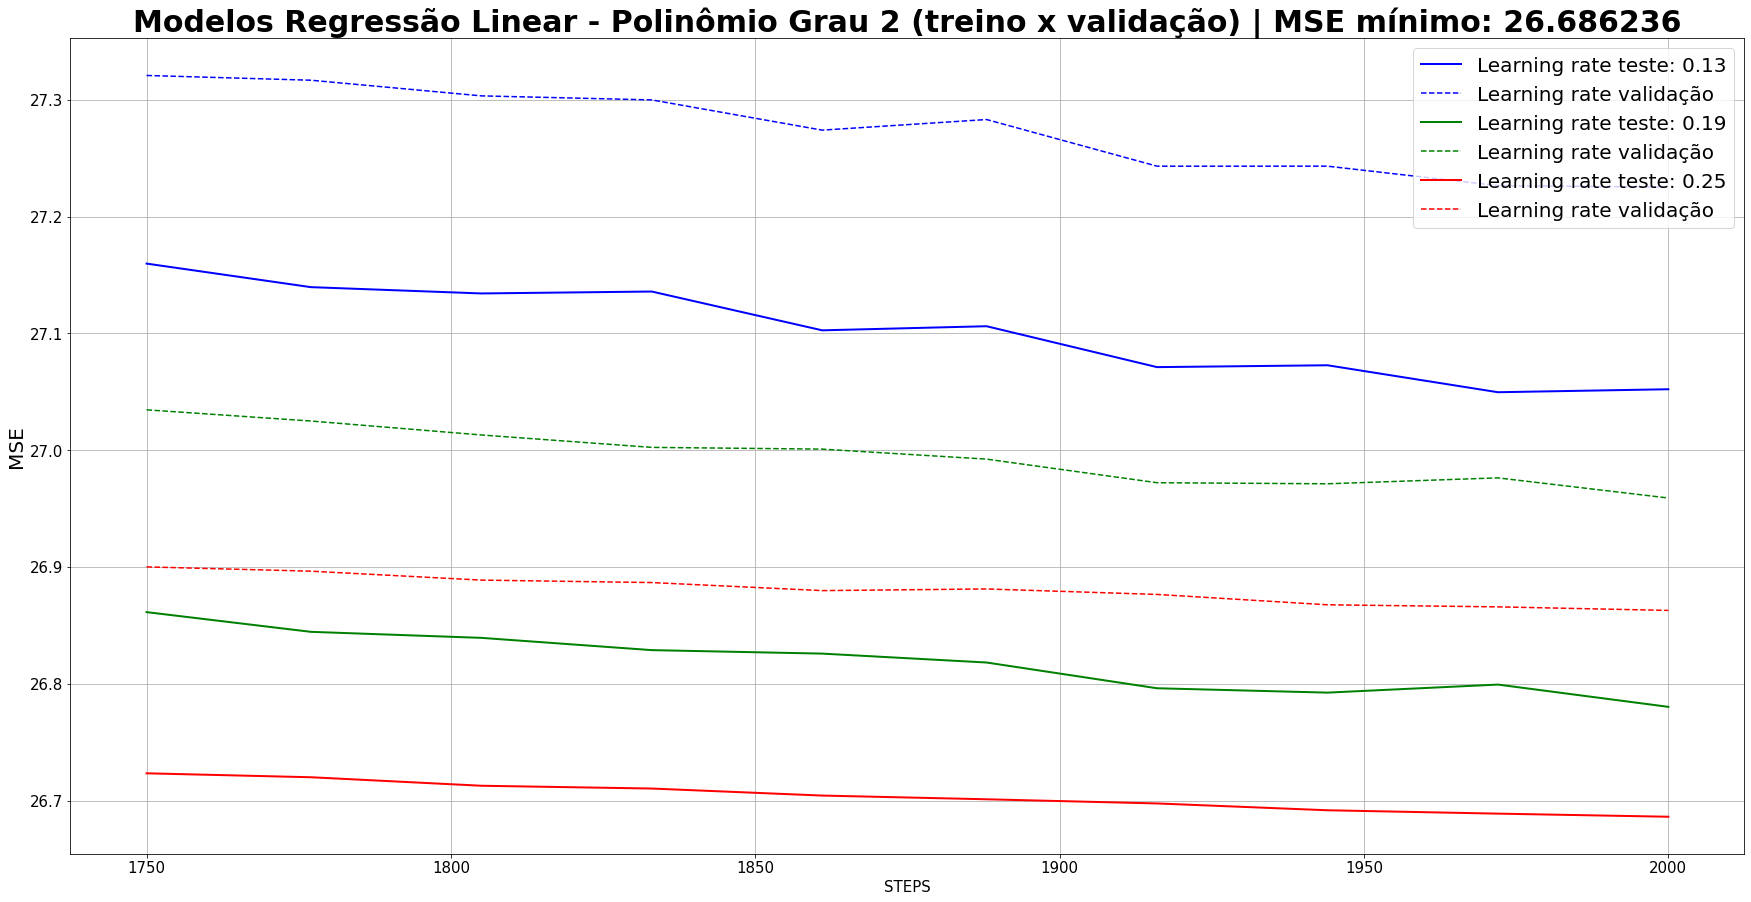

In [24]:
compara_modelos_reglin (lrts_ini=0.13, lrts_fin=0.25, num_lrts=3,
                        step_ini=1750, step_fin=2000, num_steps=10, X_comp=Xtrain_poly,
                        titulo="Modelos Regressão Linear - Polinômio Grau 2 (treino x validação)", plot_val=True)

Adotaremos o learning rate de 0.25. Valores maiores tendem a gerar erros substancialmente mais altos. Utilzaremos o num_steps=2000, pois é onde o erro fica mais próximo do mínimo. Com esta combinação, as métricas de treino e validação são estáveis.

In [25]:
relatorio_reglin ("REGRESSÃO POLINOMIAL GRAU 2", 0.25, 2000, Xtrain_poly, Xtest_poly)

REGRESSÃO POLINOMIAL GRAU 2

Modelo:  Regressão Linear
Métrica:  MSE
Média treino:  26.68575162104151
Média validação:  26.86473097445934
MSE do modelo em teste:  26.78451821108754

Modelo:  Regressão Linear - ScikitLearn
Métrica:  MSE
Média treino:  26.624015446466217
Média validação:  26.804194025424447
MSE do modelo em teste:  26.720170224734908


Aqui também, os resultados são semelhantes no modelo implementado manualmente e no da biblioteca.

In [26]:
poly=PolynomialFeatures(degree=3,include_bias=False)
Xtrain_poly = poly.fit_transform(Xtrain)
Xtest_poly = poly.fit_transform(Xtest)

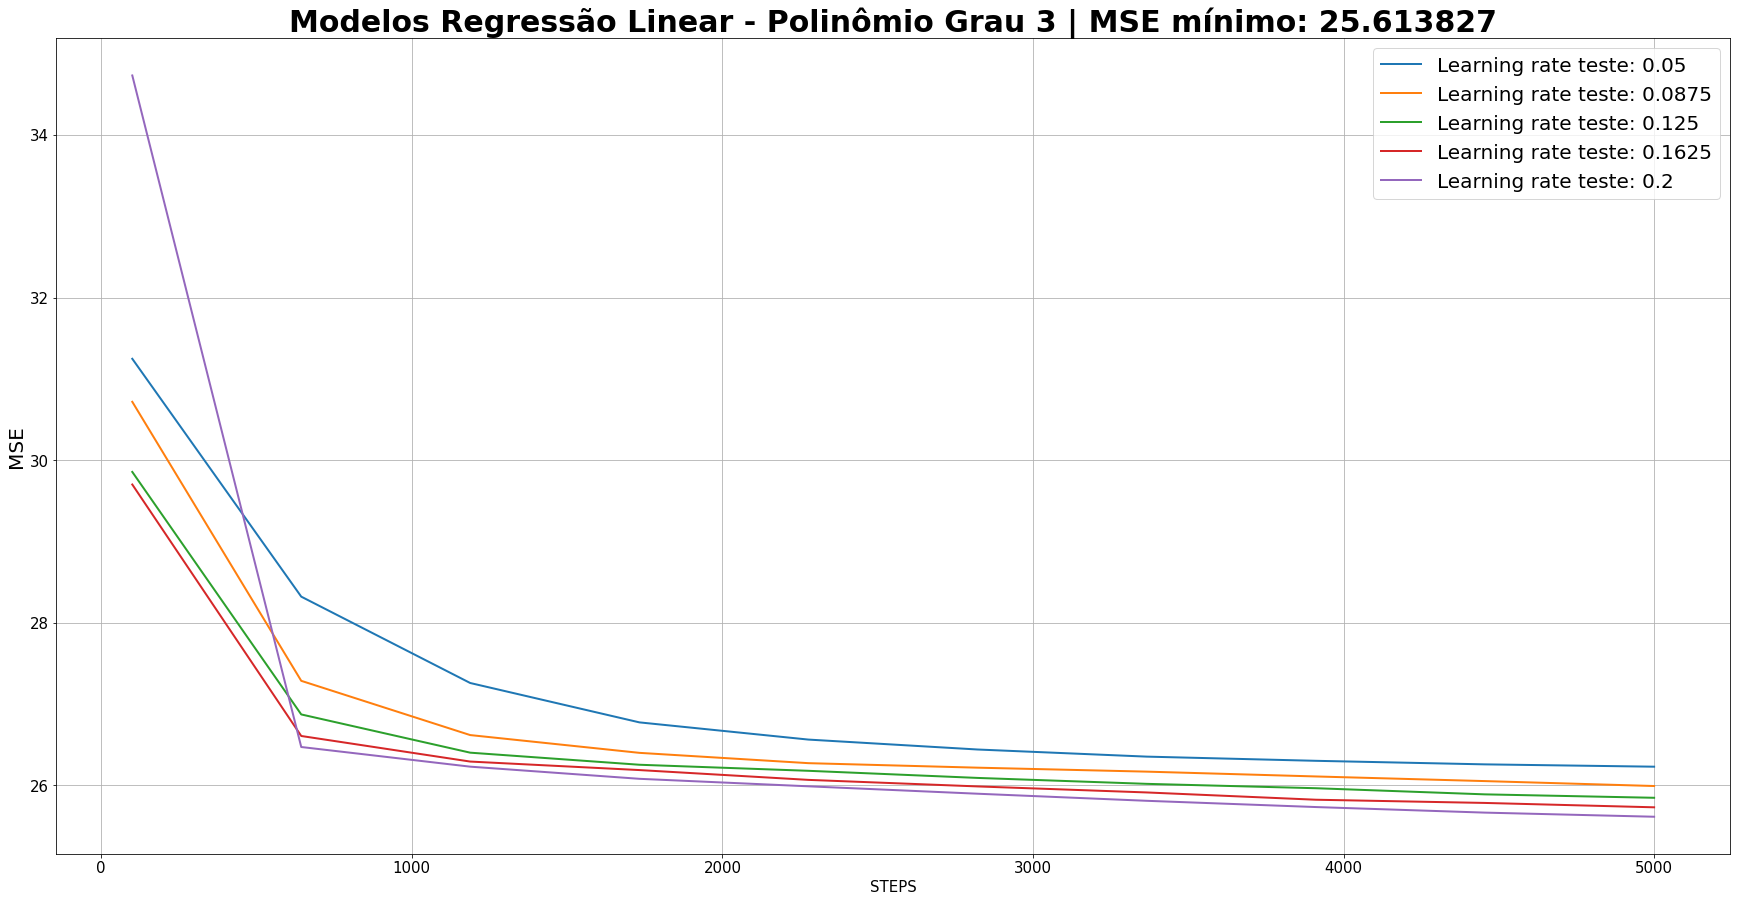

In [27]:
compara_modelos_reglin (lrts_ini=0.05, lrts_fin=0.2, num_lrts=5,
                        step_ini=100, step_fin=5000, num_steps=10, X_comp=Xtrain_poly,
                        titulo="Modelos Regressão Linear - Polinômio Grau 3")

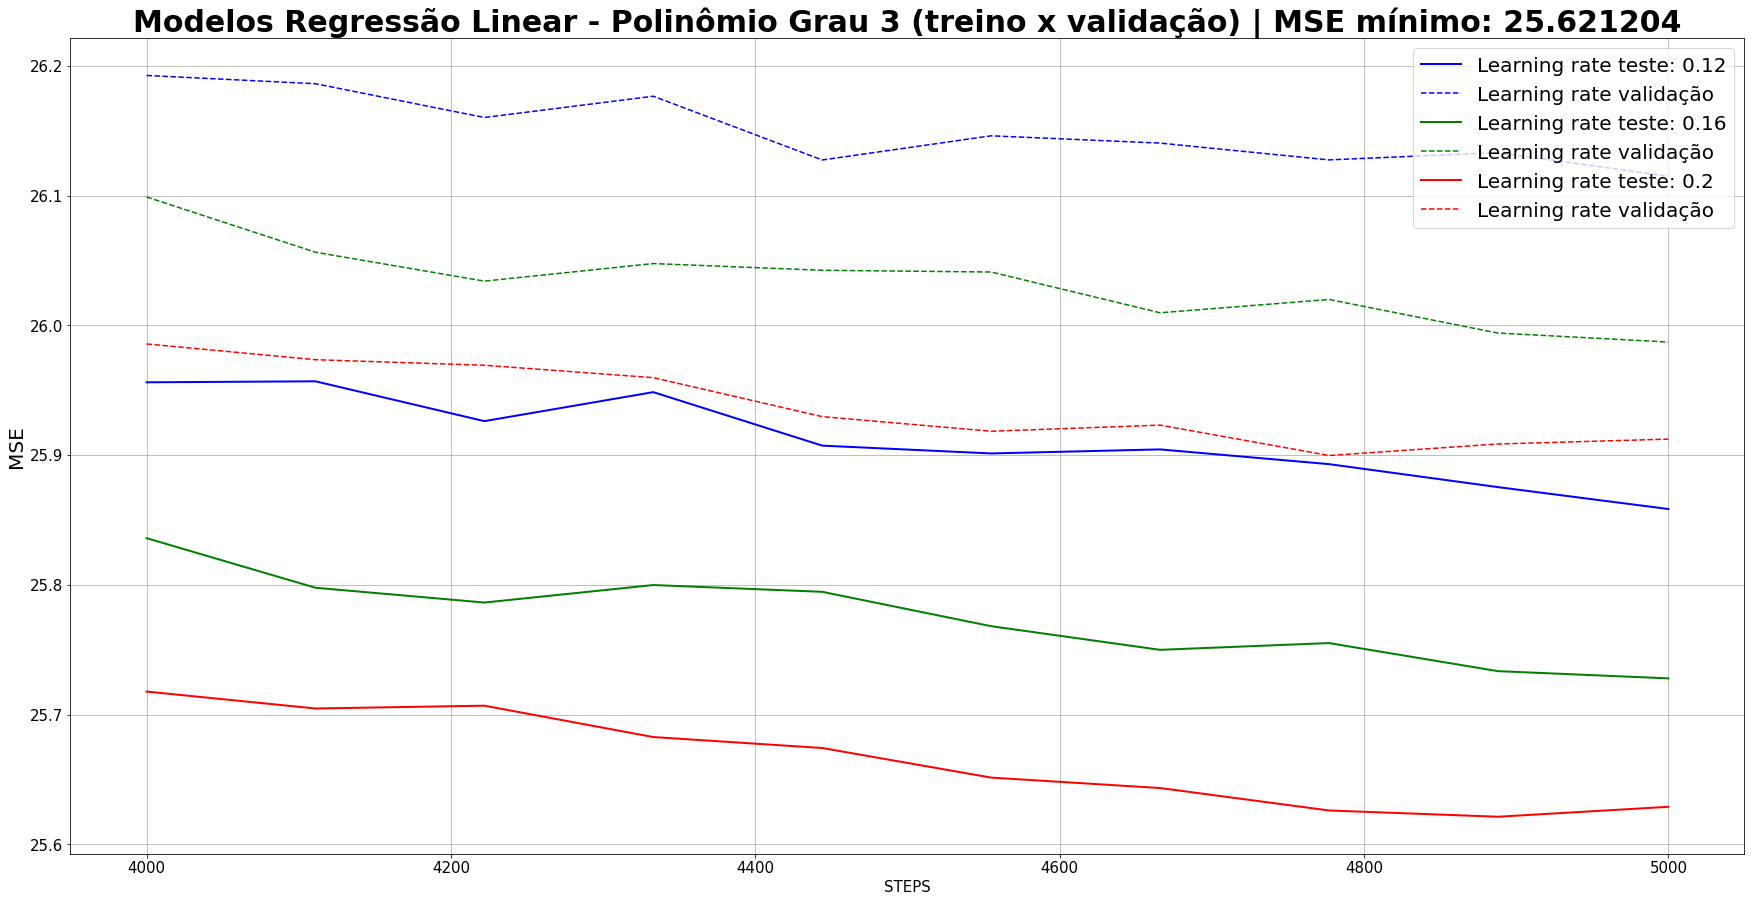

In [28]:
compara_modelos_reglin (lrts_ini=0.12, lrts_fin=0.2, num_lrts=3,
                        step_ini=4000, step_fin=5000, num_steps=10, X_comp=Xtrain_poly,
                        titulo="Modelos Regressão Linear - Polinômio Grau 3 (treino x validação)", plot_val=True)

Observamos que, conforme o grau do polinômio vai aumentando, são necessários muito mais passos para superar as métricas de modelos de graus menores e consequentemente maior exigência de processamento. Cabe avaliar se os ganhos (neste caso baixos) na precisão do modelo compensam o esforço necessário para atingi-lo.

In [29]:
relatorio_reglin ("REGRESSÃO POLINOMIAL GRAU 3", 0.2, 5000, Xtrain_poly, Xtest_poly)

REGRESSÃO POLINOMIAL GRAU 3

Modelo:  Regressão Linear
Métrica:  MSE
Média treino:  25.606875292481313
Média validação:  25.874195628055087
MSE do modelo em teste:  26.005829845049504

Modelo:  Regressão Linear - ScikitLearn
Métrica:  MSE
Média treino:  24.681903433199768
Média validação:  25.089115413249296
MSE do modelo em teste:  25.603488645862637


In [30]:
# vamos testar algumas combinações de features sem potenciações, somente as interativas entre as features originais.

poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)
Xtrain_poly = poly.fit_transform(Xtrain)
Xtest_poly = poly.fit_transform(Xtest)

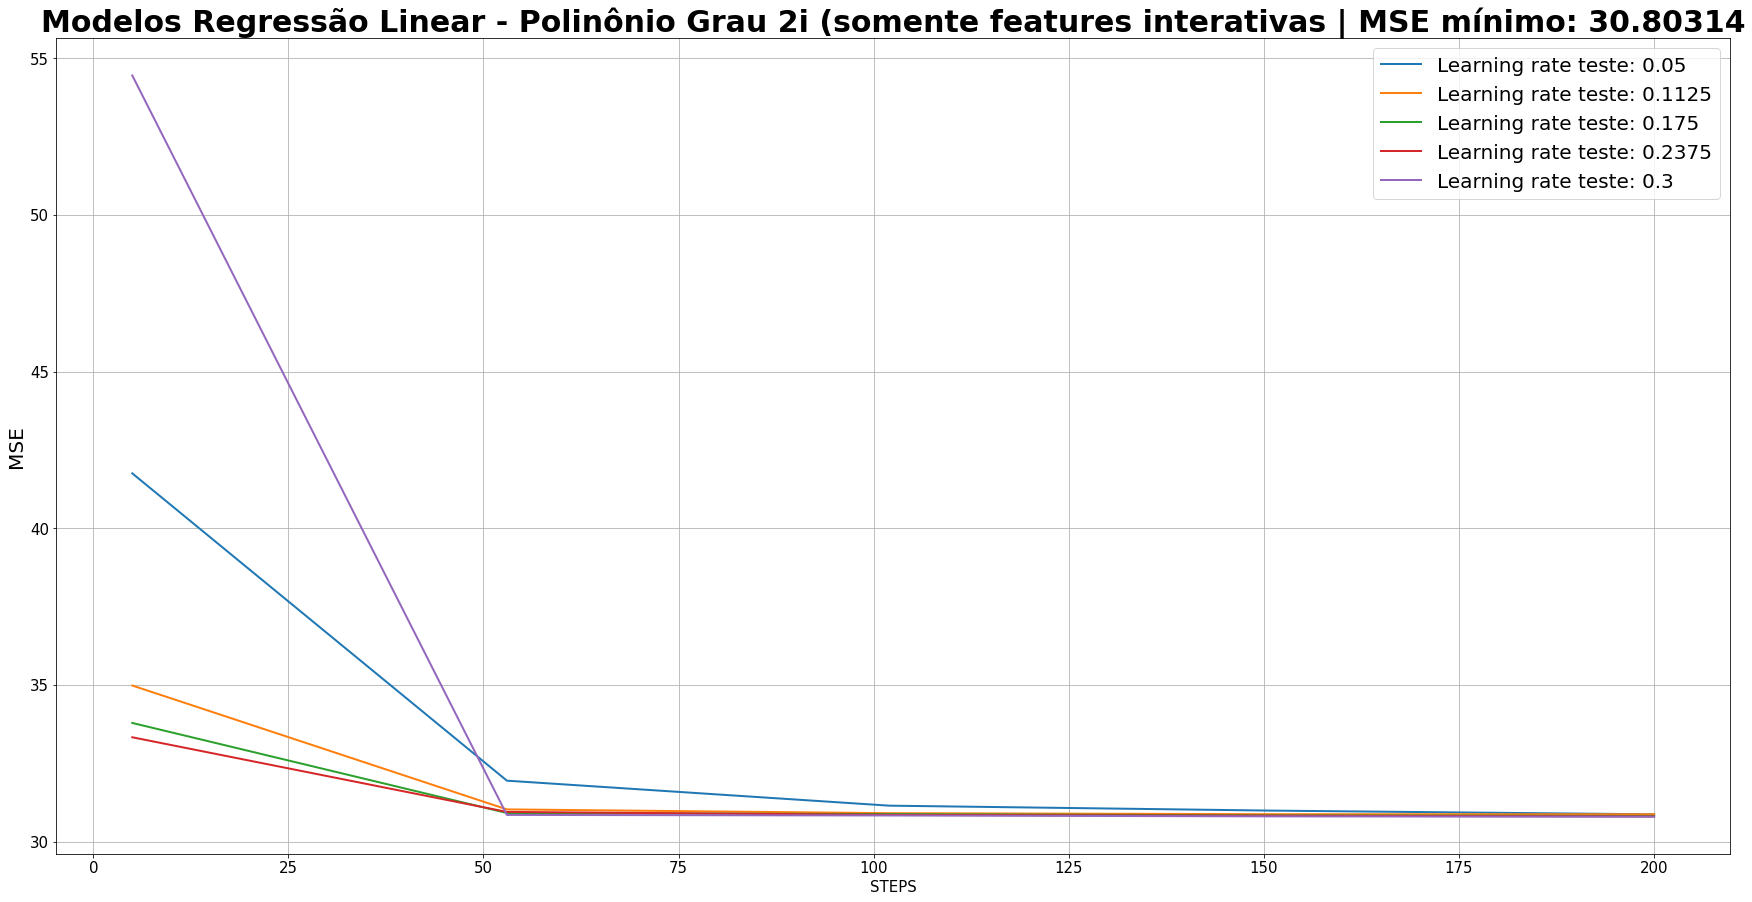

In [31]:
compara_modelos_reglin (lrts_ini=0.05, lrts_fin=0.30, num_lrts=5,
                        step_ini=5, step_fin=200, num_steps=5, X_comp=Xtrain_poly,
                        titulo="Modelos Regressão Linear - Polinônio Grau 2i (somente features interativas")

In [32]:
relatorio_reglin("MODELO REGRESSÃO POLINOMIAL GRAU 2 (somente features interativas - sem potenciações",
                 0.3, 200, Xtrain_poly, Xtest_poly)

MODELO REGRESSÃO POLINOMIAL GRAU 2 (somente features interativas - sem potenciações

Modelo:  Regressão Linear
Métrica:  MSE
Média treino:  30.77915906810847
Média validação:  30.92735859322695
MSE do modelo em teste:  31.132378434318063

Modelo:  Regressão Linear - ScikitLearn
Métrica:  MSE
Média treino:  30.684088310308073
Média validação:  30.852530477088134
MSE do modelo em teste:  31.089721214290396


Neste modelo, o MSE é semelhante aos obtidos com as features originais. A diferença é que, em todas as learning rates testadas, os MSE´s atingem uma faixa de valores uniformes com num_steps bem mais baixo (aprox. 60).

In [33]:
poly=PolynomialFeatures(degree=3,interaction_only=True,include_bias=False)
Xtrain_poly = poly.fit_transform(Xtrain)
Xtest_poly = poly.fit_transform(Xtest)

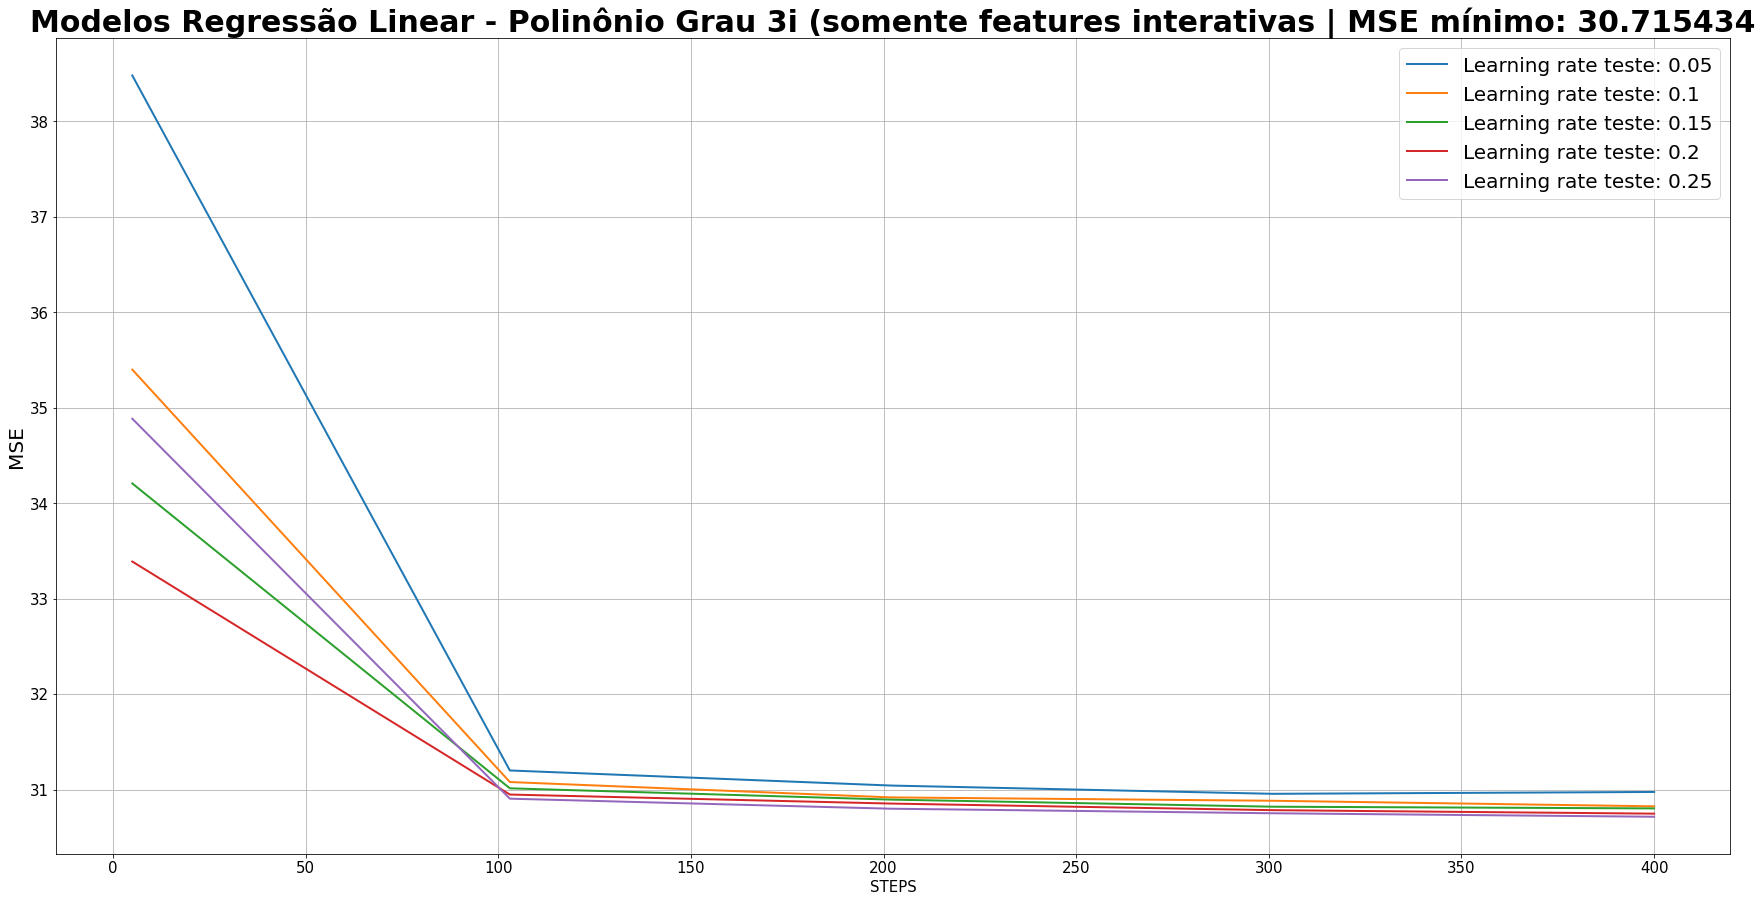

In [34]:
compara_modelos_reglin (lrts_ini=0.05, lrts_fin=0.25, num_lrts=5,
                        step_ini=5, step_fin=400, num_steps=5, X_comp=Xtrain_poly,
                        titulo="Modelos Regressão Linear - Polinônio Grau 3i (somente features interativas")

In [35]:
relatorio_reglin("MODELO REGRESSÃO POLINOMIAL GRAU 3 (somente features interativas - sem potenciações)",
                 0.25, 400, Xtrain_poly, Xtest_poly)

MODELO REGRESSÃO POLINOMIAL GRAU 3 (somente features interativas - sem potenciações)

Modelo:  Regressão Linear
Métrica:  MSE
Média treino:  30.706838601417424
Média validação:  30.857367760668716
MSE do modelo em teste:  31.164909744631704

Modelo:  Regressão Linear - ScikitLearn
Métrica:  MSE
Média treino:  30.625578039414346
Média validação:  30.935154315223297
MSE do modelo em teste:  31.194306530494188


No grau 3, não se observa ganhos de precisão e é necessário um número de passos maior para atingir os mesmos valores.

In [36]:
poly=PolynomialFeatures(degree=4,include_bias=False)
Xtrain_poly = poly.fit_transform(Xtrain)
Xtest_poly = poly.fit_transform(Xtest)

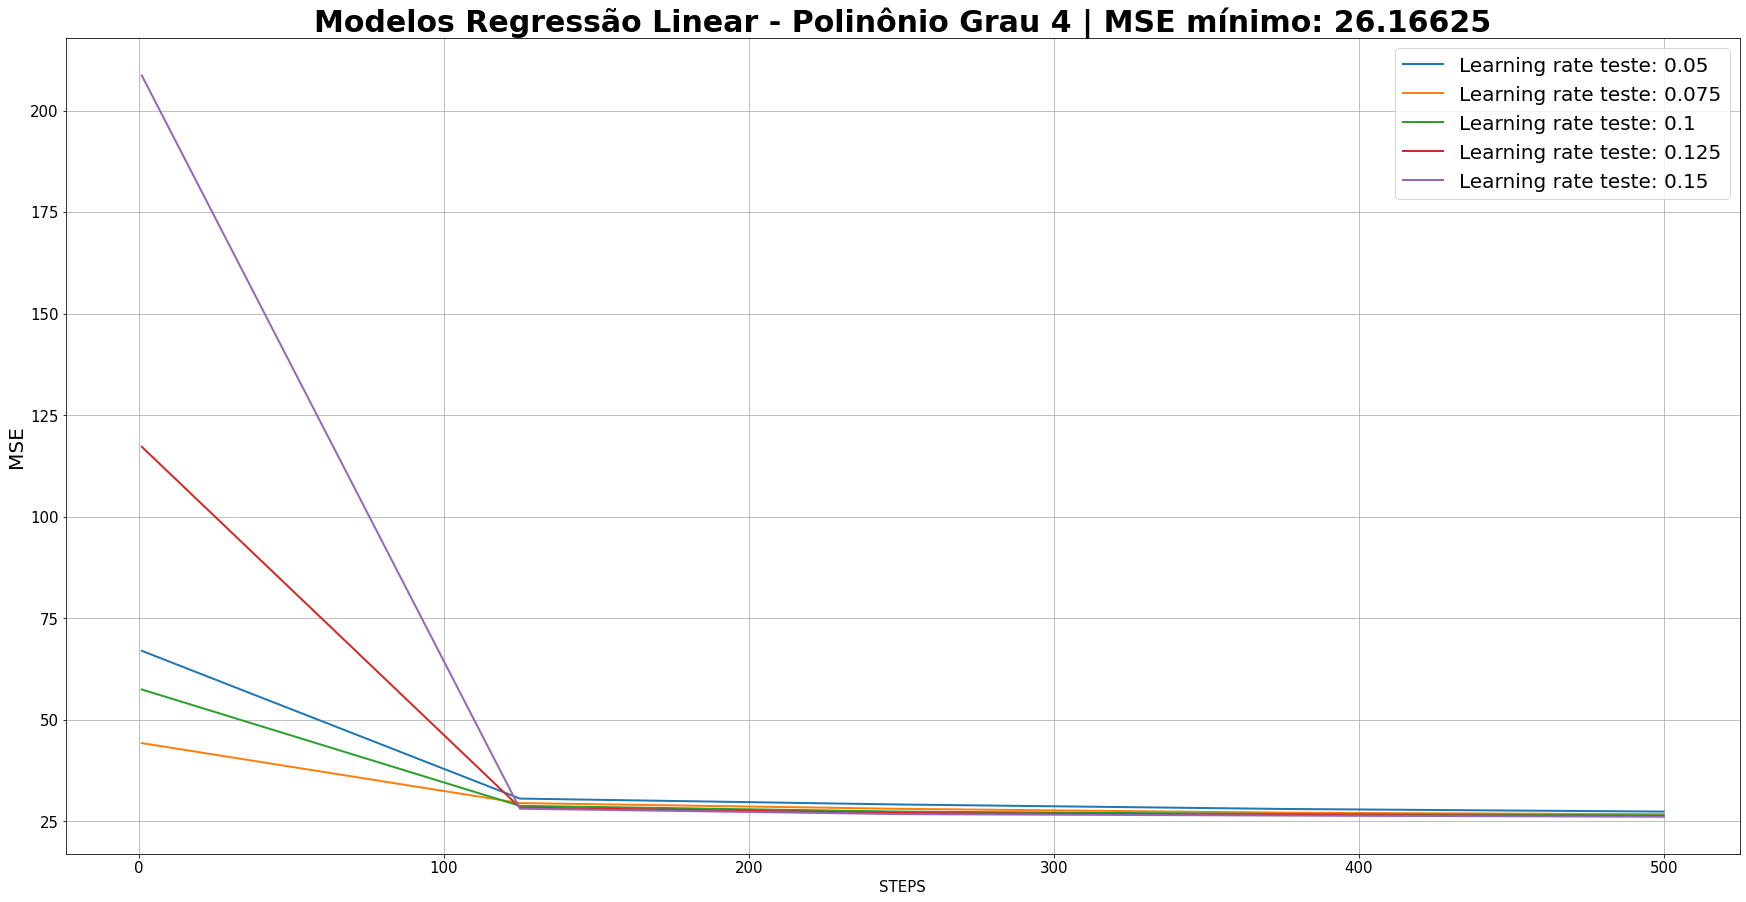

In [37]:
compara_modelos_reglin (lrts_ini=0.05, lrts_fin=0.15, num_lrts=5,
                        step_ini=1, step_fin=500, num_steps=5, X_comp=Xtrain_poly,
                        titulo="Modelos Regressão Linear - Polinônio Grau 4")

In [38]:
relatorio_reglin("MODELO REGRESSÃO POLINOMIAL GRAU 4",
                 0.15, 500, Xtrain_poly, Xtest_poly)

MODELO REGRESSÃO POLINOMIAL GRAU 4

Modelo:  Regressão Linear
Métrica:  MSE
Média treino:  26.189023580438963
Média validação:  26.37767684880284
MSE do modelo em teste:  26.30426092679762

Modelo:  Regressão Linear - ScikitLearn
Métrica:  MSE
Média treino:  24.38905848064138
Média validação:  25.290915379284062
MSE do modelo em teste:  25.535350420378236


No modelo de grau 4, as métricas finais são semelhantes ao grau 2 (com potenciação), mas com a vantagem de atingir resultados estáveis com menor número de passos.

Vamos testar modelos de regressão polinomiais utilizando regularizações

In [39]:
from sklearn.linear_model import Ridge, Lasso

In [40]:
from sklearn.pipeline import Pipeline

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
#validacao_cruzada_mods_reglin(classificador = poly_reg, nome_classificador = "Regressão Polinomial",X=Xtrain,
#                              y=ytrain, n_folds=5, metrica= mean_squared_error, nome_metrica="MSE", print_res=True)

In [43]:
#mse_teste = mean_squared_error (y_true = ytest, y_pred = poly_reg.predict(Xtest))
#print (mse_teste)

In [44]:
import warnings
warnings.filterwarnings("ignore")

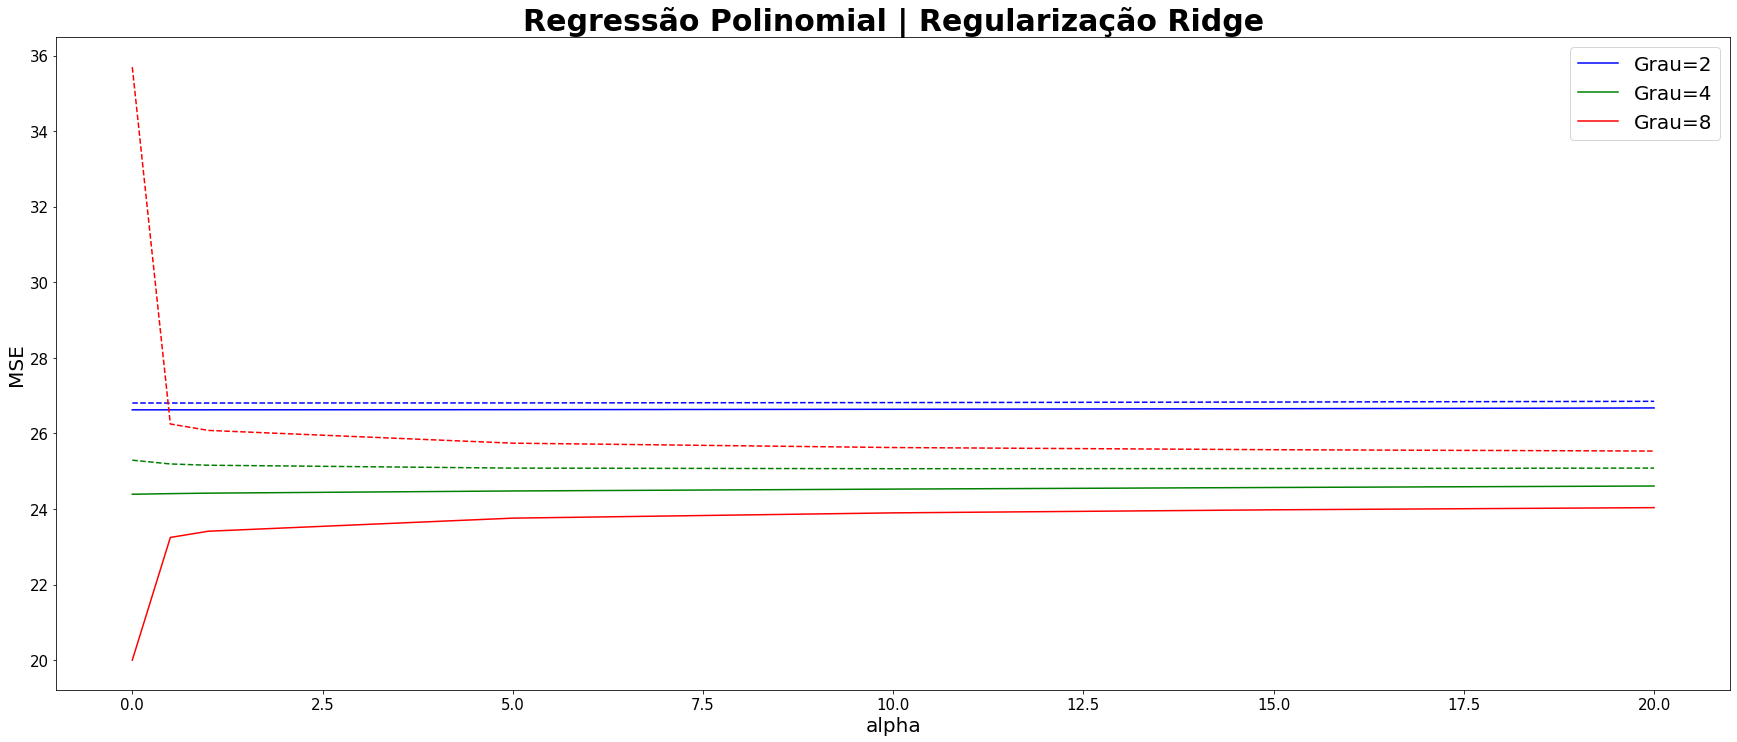

In [45]:
# plota curvas de desempenho de modelos de regressão polinomial em diferentes graus, utilizando regularização Ridge.
# MSE como função de alpha

graus = [2,4,8]
lista_cores=np.random.choice(['b','g','r','c','m','y','k'],len(graus), replace=False)
plt.figure(figsize=[30,12])

lista_alpha=[0, 0.5, 1, 5, 10, 15,20]
lista_cores=['b','g','r','c','m','y','k']

for grau, cor in zip(graus, lista_cores):
    lista_mse_treino, lista_mse_val=[],[]
    
    for alpha in lista_alpha:
        nome_mod_regulariza = "Ridge | alpha:"+str(alpha)
        modelo_regulariza=Ridge(alpha=alpha)                            
        poly=PolynomialFeatures(degree=grau,include_bias=False)
        poly_reg = Pipeline([("poly_feature", poly), ("std_scaler", StandardScaler()),
                             (nome_mod_regulariza, modelo_regulariza)])

        mean_mse_treino, mean_mse_val = validacao_cruzada_mods_reglin(classificador = poly_reg,
                                        nome_classificador = nome_mod_regulariza, X=Xtrain,y=ytrain,
                                        n_folds=5, metrica= mean_squared_error, nome_metrica="MSE", print_res=False)
        lista_mse_treino.append(mean_mse_treino)
        lista_mse_val.append(mean_mse_val)
    plt.plot (lista_alpha, lista_mse_treino, c=cor, label="Grau="+str(grau))
    plt.plot (lista_alpha, lista_mse_val,"--", c=cor)
    
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("MSE", fontsize=20)
plt.xlabel("alpha", fontsize=20)
plt.legend(fontsize=20)
plt.title("Regressão Polinomial | Regularização Ridge", fontsize=30, fontweight="bold")
plt.show()

Observamos que os modelos com graus mais altos beneficiam-se mais da regularização, reduzindo o overfitting com o aumento do alpha, resultando em métricas melhores em treino. Porém, mesmo com a regularização, há um limite na capacidade de redução do overfitting, que aumenta junto com grau. Valores de alpha acima de 2 não produzem resultados substancialmente melhores

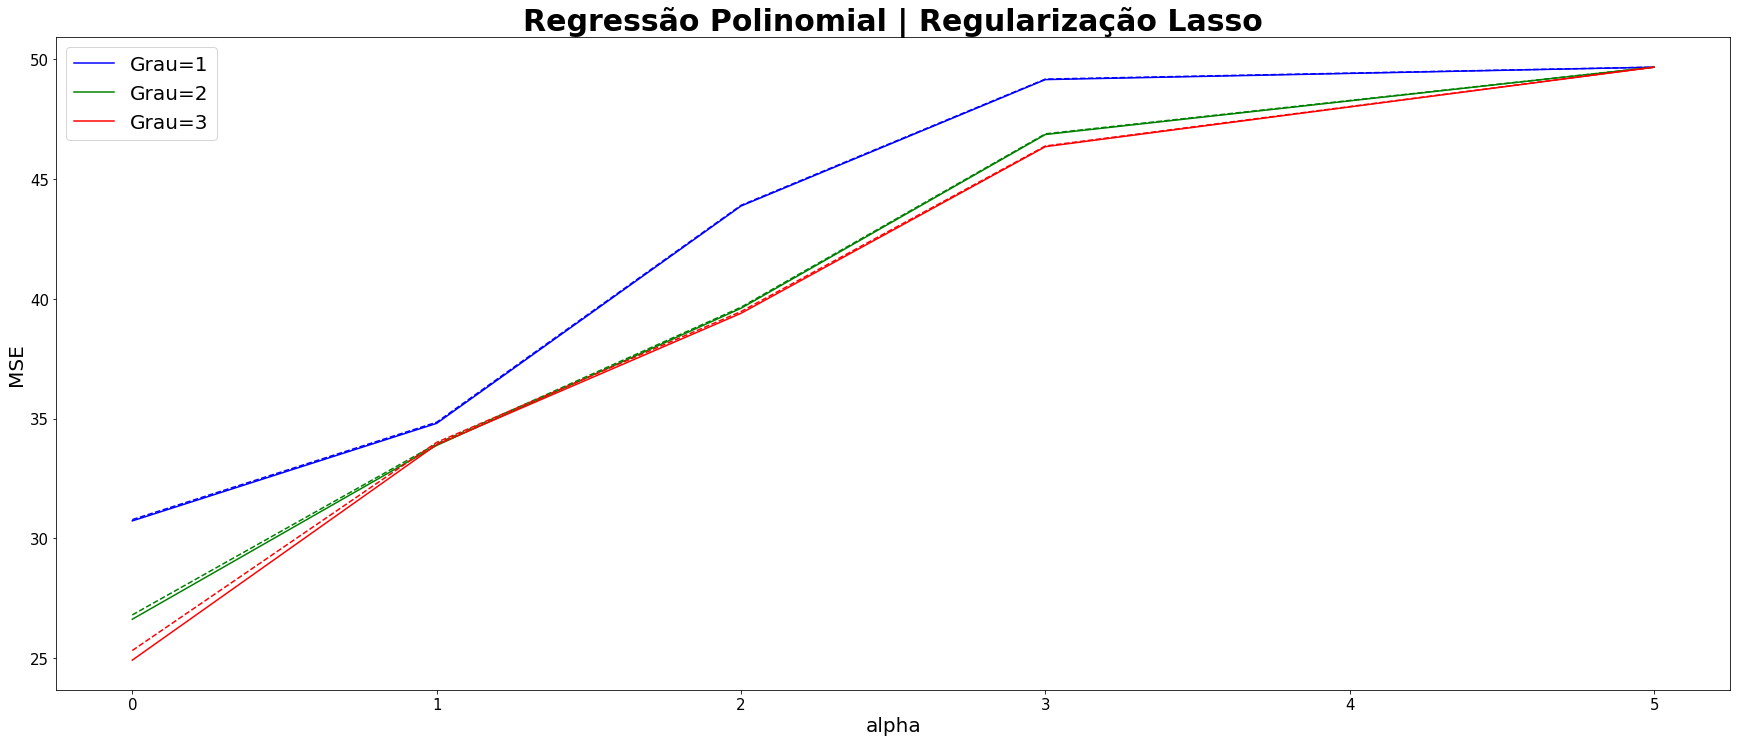

In [46]:
# plota curvas de desempenho de modelos de regressão polinomial em diferentes graus, utilizando regularização Lasso.
# MSE como função de alpha

graus = [1,2,3]
lista_cores=np.random.choice(['b','g','r','c','m','y','k'],len(graus), replace=False)
plt.figure(figsize=[30,12])

lista_alpha=[0, 1, 2, 3, 5]
lista_cores=['b','g','r','c','m','y','k']

for grau, cor in zip(graus, lista_cores):
    lista_mse_treino, lista_mse_val=[],[]
    
    for alpha in lista_alpha:
        nome_mod_regulariza = "Lasso | alpha:"+str(alpha)
        modelo_regulariza=Lasso(alpha=alpha)                            
        poly=PolynomialFeatures(degree=grau,include_bias=False)
        poly_reg = Pipeline([("poly_feature", poly), ("std_scaler", StandardScaler()),
                             (nome_mod_regulariza, modelo_regulariza)])

        mean_mse_treino, mean_mse_val = validacao_cruzada_mods_reglin(classificador = poly_reg,
                                        nome_classificador = nome_mod_regulariza, X=Xtrain,y=ytrain,
                                        n_folds=5, metrica= mean_squared_error, nome_metrica="MSE", print_res=False)
        lista_mse_treino.append(mean_mse_treino)
        lista_mse_val.append(mean_mse_val)
    plt.plot (lista_alpha, lista_mse_treino, c=cor, label="Grau="+str(grau))
    plt.plot (lista_alpha, lista_mse_val,"--", c=cor)
    
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("MSE", fontsize=20)
plt.xlabel("alpha", fontsize=20)
plt.legend(fontsize=20)
plt.title("Regressão Polinomial | Regularização Lasso", fontsize=30, fontweight="bold")
plt.show()

A regularização Lasso não produziu resultados melhores do que a regressão sem regularização.

<br>

### Exercício: Regressão Logística:

__Parte 1:__

Crie uma classe regLogistica para treinar o modelo de regressão logística. Essa classe deve ser usada para problemas de classificação binária, cuja variável target assume os valores: 0 (classe negativa) e 1 (classe positiva).

O método construtor dessa classe deve possuir 3 parâmetros: learning_rate, num_steps e limiar.

Os outros médotos devem ser:

    - médoto fit: para treinar o modelo - usando gradient descent
    
    - médoto predict_proba: para retornar a probabilidade da classe 1
    
    - médoto predict: retornar a classe predita: 0 ou 1 - dependente do limiar
    
__Parte 2:__

Usando a função getData2(), carregue o dataset disponibilizado.

Use a regLogistica, classe criada na parte 1 do exercício, para treinar modelos nestes dados. Use validação cruzada para seleção dos parâmetros. Considere diferentes métricas de classificação e justifique as escolhas.

In [47]:
class regLogistica():
    
    def __init__(self, learning_rate, num_steps, limiar, print_info=False):
        self.learning_rate = learning_rate
        self.num_steps = num_steps
        self.limiar = limiar
        self.print_info = print_info
        
    def fit(self, X, y,print_info=False):
        y = y.reshape(-1,1)
        X_b = np.c_[np.ones(X.shape[0]),X]
        theta = np.random.randn(X_b.shape[1],1)
        
        for step in range(self.num_steps):
            
            yscores = 1 / (1 + np.exp(-1*(X_b.dot(theta))))
            gradients = X_b.T.dot(yscores - y)
            theta = theta - self.learning_rate * gradients
                           
        self.theta_final = theta
        if print_info:
            print("modelo treinado.")
            print(self.theta_final)
                           
    def predict_proba(self, X):
        X_b = np.c_[np.ones(X.shape[0]),X]
        probs = 1 / (1 + np.exp(-1*(X_b.dot(self.theta_final))))
        return probs.reshape(-1,)
        
    def predict(self, X):
        X_b = np.c_[np.ones(X.shape[0]),X]
        probs = 1 / (1 + np.exp(-1*(X_b.dot(self.theta_final))))
        preds = np.where(probs > self.limiar, 1, 0)
        return preds.reshape(-1,)

In [48]:
X, y = getData2()

In [49]:
print (X.shape)
print (y.shape)

(10000, 5)
(10000,)


In [50]:
print ("Total classe 0: ", len(y[y==0]), " ", round(len(y[y==0])/len(y)*100,2), "%")
print ("Total classe 1: ", len(y[y==1]), " ", round(len(y[y==1])/len(y)*100,2), "%")

Total classe 0:  4994   49.94 %
Total classe 1:  5006   50.06 %


In [51]:
Xtrain = X[:8000]
Xtest = X[8000:]
ytrain = y[:8000]
ytest = y[8000:]

In [52]:
rl = regLogistica (learning_rate=0.01, num_steps=10, limiar=0.5)

In [53]:
rl.fit(Xtrain, ytrain)

In [54]:
rl.predict_proba(Xtrain)

array([0.48110268, 0.01292723, 0.99999973, ..., 0.99356639, 0.99758901,
       0.99995385])

In [55]:
rl.predict(Xtrain)

array([0, 0, 1, ..., 1, 1, 1])

In [56]:
# definição de função para implementação de validação cruzada manual, para modelos de regressão logística

def validacao_cruzada_reglog (classificador,nome_classificador, X, y,
                              n_folds, metrica, nome_metrica, predict_proba, print_res=False):
    
    metricas_treino = []
    metricas_val = []
    kf = KFold(n_splits=n_folds)
    for ind_treino, ind_val in kf.split(X, y):
        Xtrain_folds = X[ind_treino]
        ytrain_folds = y[ind_treino]
        Xval_folds = X[ind_val]
        yval_folds = y[ind_val]
        
        classificador.fit(Xtrain_folds, ytrain_folds)
        
        prob_class1_treino = classificador.predict_proba(Xtrain_folds)
        prob_class1_val = classificador.predict_proba(Xval_folds)
        pred_train = classificador.predict(Xtrain_folds)
        pred_val = classificador.predict(Xval_folds)
        
        if predict_proba:
            metricas_treino.append(metrica(ytrain_folds,prob_class1_treino))
            metricas_val.append(metrica(yval_folds, prob_class1_val))
        else:
            metricas_treino.append(metrica(ytrain_folds,pred_train))
            metricas_val.append(metrica(yval_folds, pred_val))
    
    if print_res:
        print ("Modelo: ", nome_classificador)
        print ("Métrica: ", nome_metrica)
        print ("Média treino: ", np.mean(metricas_treino))
        print ("Média validação: ", np.mean(metricas_val))
    else:
        return np.mean(metricas_treino),np.mean(metricas_val)


In [57]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

In [68]:
# função para quantificação da função de custo da regressão logística - perda logarítmica

def perda_log(ytrue, ypred_probs):
    if len(ypred_probs.shape) > 1:
        ypred_probs = ypred_probs[:,-1]
    return (ytrue * np.log(ypred_probs) + (1 - ytrue) * np.log(1 - ypred_probs)).mean() * -1

In [59]:
# esta função plota algumas curvas de desempenho dos modelos de regressão logística utilizando a métrica LogLoss, a partir de
#  intervalos de valores dados para Learning Rate e para Steps, dentro do algoritmo do gradiente descendente.

def compara_modelos_reglog (lrts_ini, lrts_fin, num_lrts, step_ini, step_fin, num_steps, X_comp, titulo, plot_val=False):
    
    if plot_val:
        lista_cores = ['b','g','r','c','m']
        if num_lrts>5:
            num_lrts=5
    
    lista_lrts = np.linspace(lrts_ini, lrts_fin, num_lrts)
    lista_steps = np.linspace(step_ini, step_fin, num_steps,dtype=int)
    

    
    logloss_min=10000
    min_steps=10000
    min_lr=1
    
    plt.figure(figsize=[30,15])
    
    i=0
    for lrts in lista_lrts:
        metricas_treino, metricas_val = [],[]

        for steps in lista_steps:
            logloss_treino, logloss_val = validacao_cruzada_reglog (classificador=regLogistica(lrts, steps,0.5),
                                    nome_classificador = "Regressão Logística", X=X_comp,
                                    y = ytrain, n_folds = 5, metrica = perda_log, nome_metrica = "LogLoss",
                                    predict_proba = True, print_res=False)
            
            metricas_treino.append(logloss_treino)
            metricas_val.append(logloss_val)

        if plot_val:
            cor = lista_cores[i]
            plt.plot(lista_steps, metricas_treino, lw=2,c=cor, label="Learning rate teste: "+str(round(lrts,6)))
            plt.plot(lista_steps, metricas_val,"--",c=cor,label="Learning rate validação")
        else:    
            plt.plot(lista_steps, metricas_treino, lw=2, label="Learning rate teste: "+str(round(lrts,6)))
            
        if np.min(metricas_treino) < logloss_min:
            logloss_min = np.min(metricas_treino)
            min_steps = steps
            min_lr = lrts
        i+=1
        
    plt.legend(fontsize=20)
    plt.ylabel("LogLoss",fontsize=20)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.xlabel("STEPS",fontsize=15)
    
    plt.grid()
    plt.title(titulo + " | LogLoss mínimo: "+str(round(logloss_min,4))+" | "+str(min_steps)+" | "+str(round(min_lr,4)),
              fontsize=30)
    plt.show()

In [69]:
# esta função gera um relatório com as métricas do modelo de regressão escolhido, em treino, validação e teste, adotando
# o algoritmo definido manualmente na função e também com o modelo nativo da biblitoeca ScikitLearn, para efeitos de comparação
# os parâmetros de entrada são o título, a learning rate e num_steps escolhidos, e os datasets de treino e teste

def relatorio_reglog(titulo, learnrt, steps, limiar, Xtreino, Xteste):
    print(titulo)
    print()
    validacao_cruzada_reglog (classificador=regLogistica(learnrt, steps, limiar),
                            nome_classificador = "Regressão Logística", X=Xtreino,
                            y = ytrain, n_folds = 5, metrica = perda_log, nome_metrica = "LogLoss",
                            predict_proba=True, print_res=True)

    rl=regLogistica(learnrt, steps, limiar)
    rl.fit(Xtreino, ytrain)
    logloss_teste = perda_log(ytest, rl.predict_proba(Xteste))
    print ("LogLoss do modelo em teste: ", logloss_teste)
    print()

    logreg=LogisticRegression()
    validacao_cruzada_reglog (classificador=logreg,
                            nome_classificador = "Regressão Logística - ScikitLearn", X=Xtreino,
                            y = ytrain, n_folds = 5, metrica = perda_log, nome_metrica = "LogLoss",
                            predict_proba=True, print_res=True)

    logloss_teste1 = perda_log(ytest, logreg.predict_proba(Xteste))
    print ("LogLoss do modelo em teste: ", logloss_teste1)

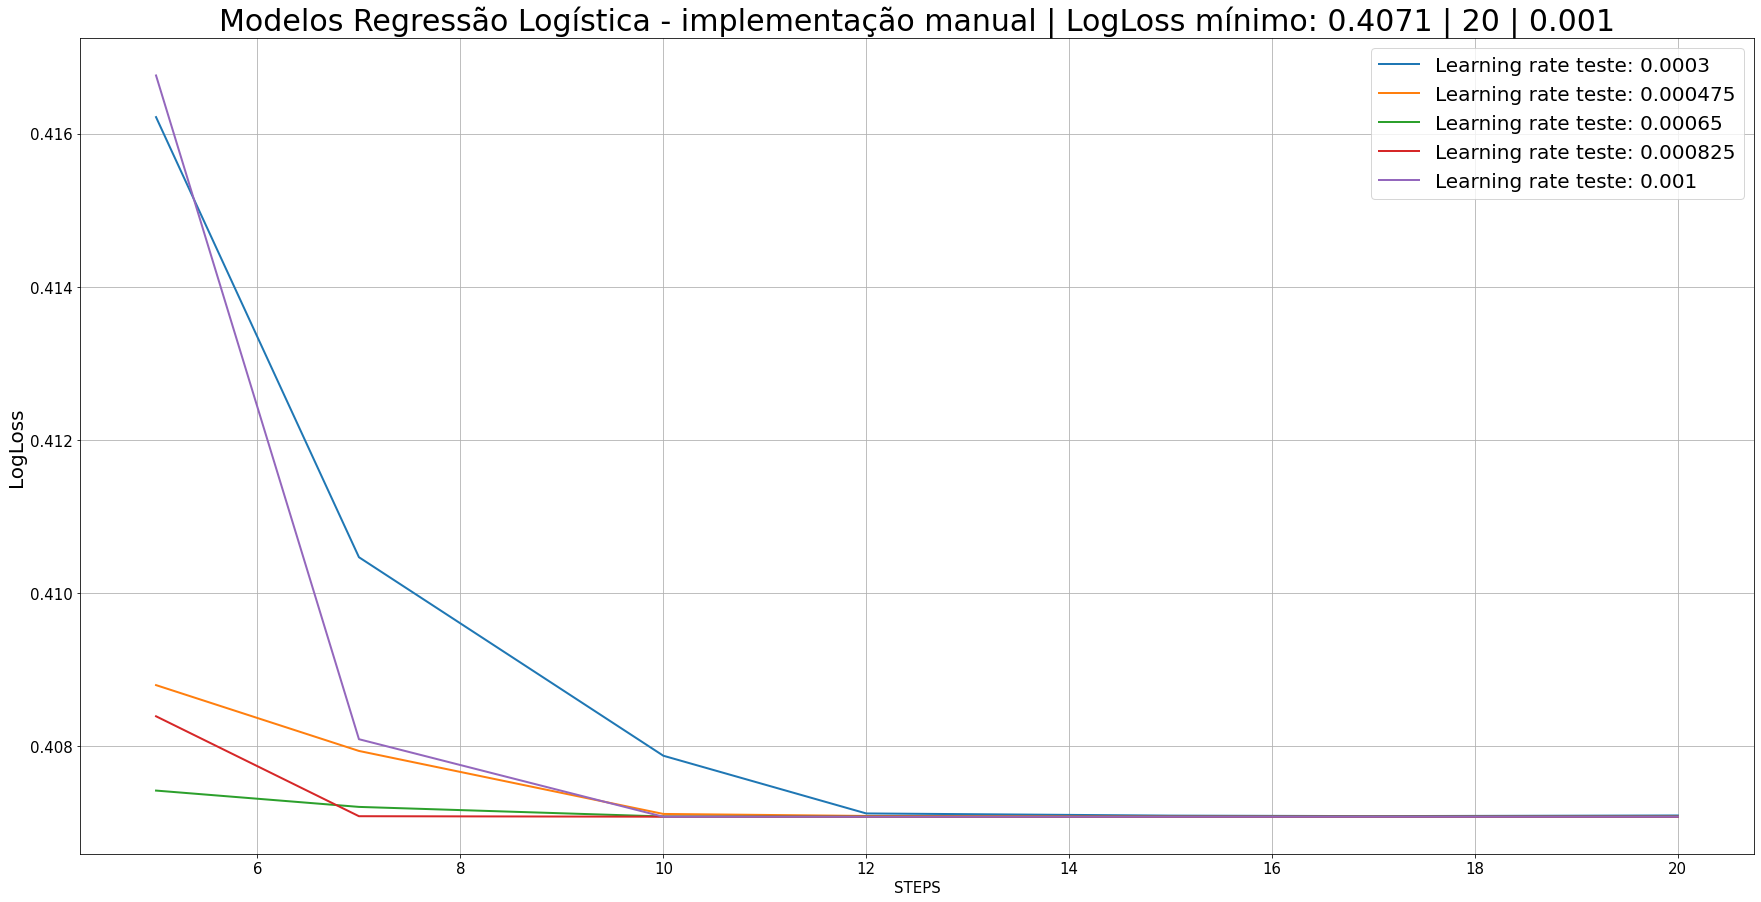

In [61]:
compara_modelos_reglog (lrts_ini=0.0003, lrts_fin=0.001, num_lrts=5,
                        step_ini=5, step_fin=20, num_steps=7, X_comp=Xtrain,
                        titulo="Modelos Regressão Logística - implementação manual")

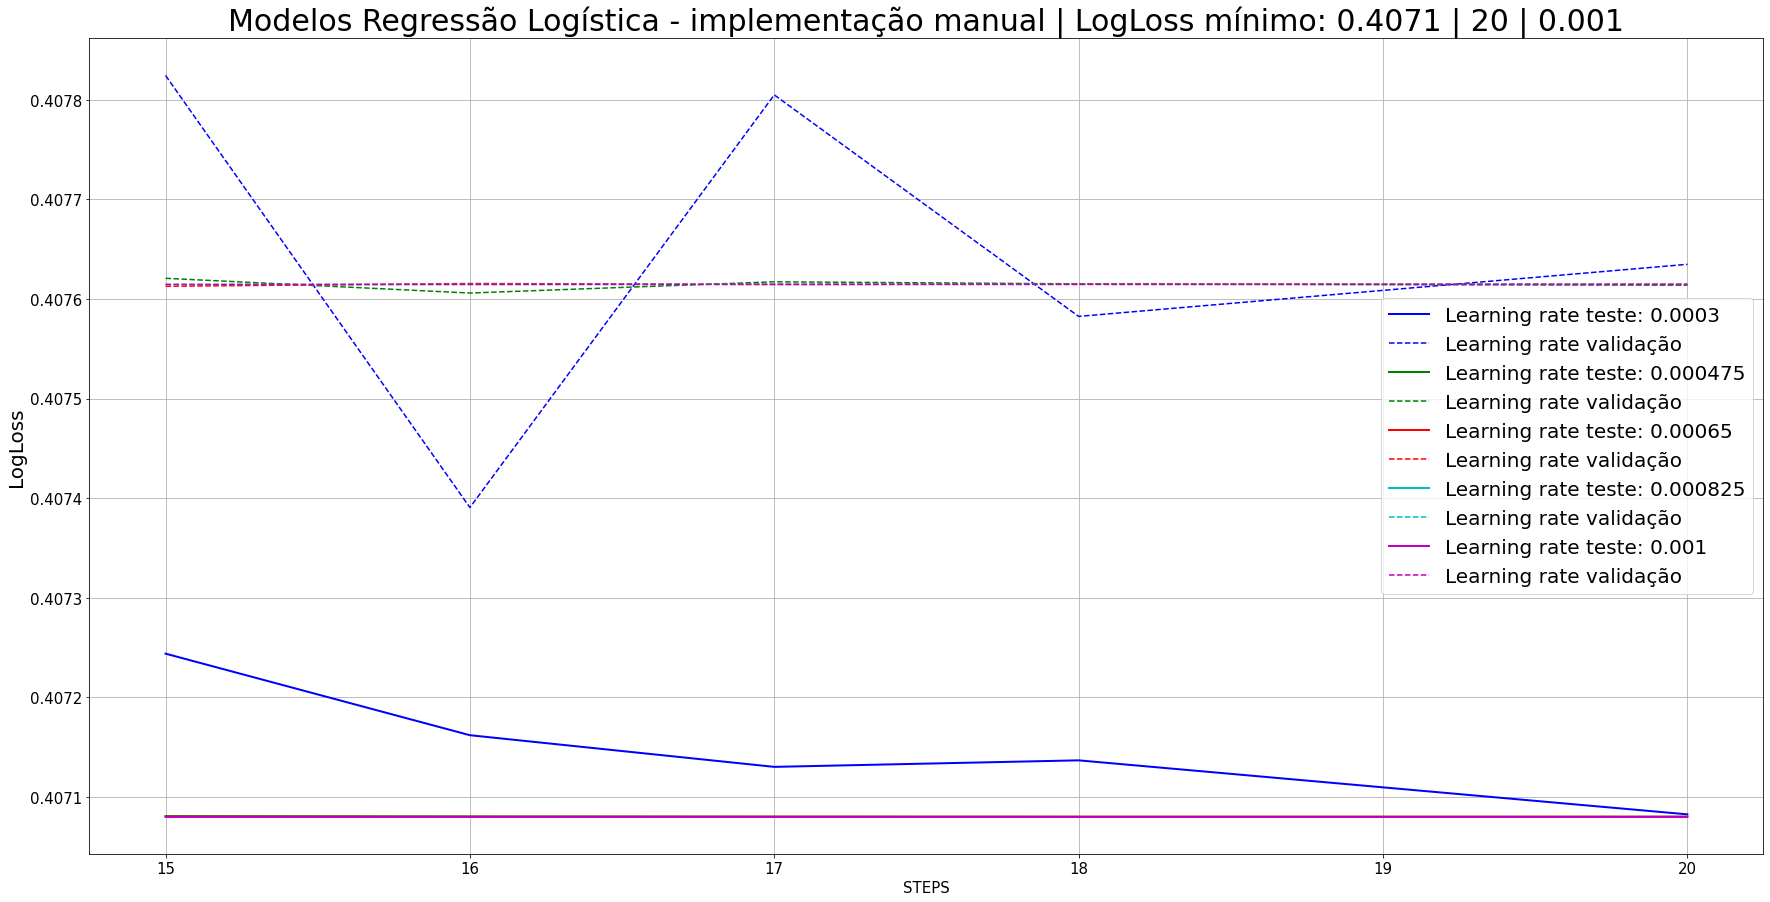

In [62]:
compara_modelos_reglog (lrts_ini=0.0003, lrts_fin=0.001, num_lrts=5,
                        step_ini=15, step_fin=20, num_steps=5, X_comp=Xtrain,
                        titulo="Modelos Regressão Logística - implementação manual", plot_val=True)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
relatorio_reglog (titulo = "REGRESSÃO LOGÍSTICA", learnrt = 0.001, steps = 20, limiar = 0.5,
                  Xtreino = Xtrain, Xteste = Xtest)

REGRESSÃO LOGÍSTICA

Modelo:  Regressão Logística
Métrica:  LogLoss
Média treino:  0.407080194752339
Média validação:  0.40761467554365094
LogLoss do modelo em teste:  0.400536300332186

Modelo:  Regressão Logística - ScikitLearn
Métrica:  LogLoss
Média treino:  0.40708043081626044
Média validação:  0.40761416676185236
LogLoss do modelo em teste:  0.4007244489245919


Comparativo entre as métricas obtidas no modelo implementado manualmente e o da biblitoeca ScikitLearn. Resultados semelhantes

Adotaremos os parâmetros learning_rate=0.001 e num_steps=20 obtidos anteriormente, para testarmos o limiar mais adequado em função de métricas específicas da regressão logística: ROC, Precision, Recall e F1

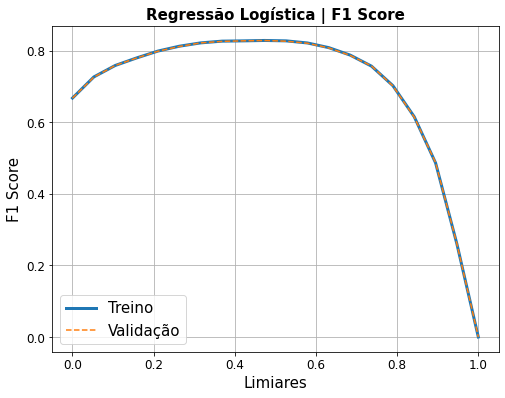

In [65]:
limiares = np.linspace(0,1,20)
lista_metrica_treino, lista_metrica_val = [], []

for limiar in limiares:
    rl = regLogistica (learning_rate = 0.001, num_steps=20, limiar = limiar)

    metrica_treino, metrica_val = validacao_cruzada_reglog (classificador = rl, nome_classificador = "Regressão Logística",
                                                            X = Xtrain, y = ytrain, n_folds = 5, metrica = f1_score,
                                                            nome_metrica = "F1 Score", predict_proba = False)
    lista_metrica_treino.append(metrica_treino)
    lista_metrica_val.append(metrica_val)

plt.figure(figsize=[8,6])
plt.plot (limiares, lista_metrica_treino, lw=3, label = "Treino")
plt.plot (limiares, lista_metrica_val, "--", label = "Validação")
plt.legend(fontsize=15)
plt.ylabel("F1 Score",fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel("Limiares",fontsize=15)

plt.grid()
plt.title("Regressão Logística | F1 Score", fontsize=15, fontweight="bold")
plt.show()

Os valor otimizado para o limiar, de acordo com o F1 Score está na faixa entre 0.4 e 0.6

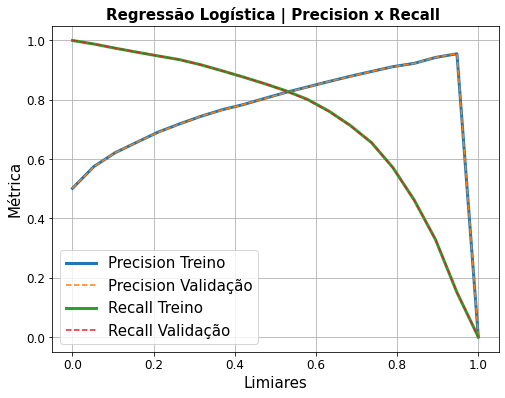

In [66]:
limiares = np.linspace(0,1,20)
lista_precision_treino, lista_precision_val = [], []
lista_recall_treino, lista_recall_val = [], []

for limiar in limiares:
    rl = regLogistica (learning_rate = 0.001, num_steps=20, limiar = limiar)

    metrica_treino, metrica_val = validacao_cruzada_reglog (classificador = rl, nome_classificador = "Regressão Logística",
                                                            X = Xtrain, y = ytrain, n_folds = 5, metrica = precision_score,
                                                            nome_metrica = "Precision Score", predict_proba = False)
    lista_precision_treino.append(metrica_treino)
    lista_precision_val.append(metrica_val)

for limiar in limiares:
    rl = regLogistica (learning_rate = 0.001, num_steps=20, limiar = limiar)

    metrica_treino, metrica_val = validacao_cruzada_reglog (classificador = rl, nome_classificador = "Regressão Logística",
                                                            X = Xtrain, y = ytrain, n_folds = 5, metrica = recall_score,
                                                            nome_metrica = "Recall Score", predict_proba = False)
    lista_recall_treino.append(metrica_treino)
    lista_recall_val.append(metrica_val)
    
plt.figure(figsize=[8,6])
plt.plot (limiares, lista_precision_treino, lw=3, label = "Precision Treino")
plt.plot (limiares, lista_precision_val, "--", label = "Precision Validação")
plt.plot (limiares, lista_recall_treino, lw = 3, label = "Recall Treino")
plt.plot (limiares, lista_recall_val, "--", label = "Recall Validação")

plt.legend(fontsize=15)
plt.ylabel("Métrica",fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel("Limiares",fontsize=15)

plt.grid()
plt.title("Regressão Logística | Precision x Recall ", fontsize=15, fontweight="bold")
plt.show()

Avaliando o trade-off entre Precision e Recall, temos que o limiar que equilibra as duas métricas está entre 0,5 e 0,55

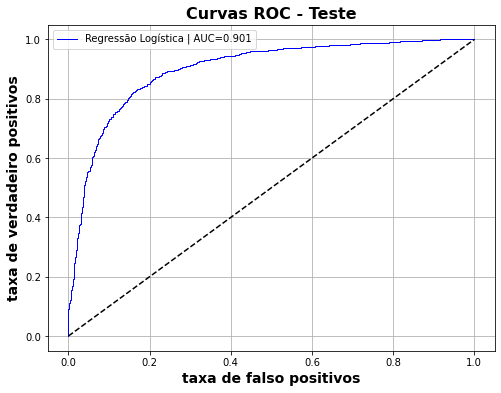

In [67]:
plt.figure(figsize=[8,6])


rl = regLogistica (learning_rate = 0.001, num_steps=20, limiar = 0.5)
rl.fit(Xtrain, ytrain)
fpr, tpr, thresh = roc_curve(y_true = ytest, y_score = rl.predict_proba(Xtest))
auc = roc_auc_score(y_true = ytest, y_score = rl.predict_proba(Xtest))
plt.plot(fpr, tpr, c = 'blue', lw = 1, label="Regressão Logística | AUC="+str(round(auc,3)))

plt.title("Curvas ROC - Teste", fontsize = 16, fontweight = 'bold')
plt.xlabel("taxa de falso positivos", fontsize = 14, fontweight = 'bold')
plt.ylabel("taxa de verdadeiro positivos", fontsize = 14, fontweight = 'bold')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal     
plt.legend()
plt.grid()
plt.show()

Aqui temos as métricas finais do modelo, com a métrica de área sob a curva ROC (AUC), atuando sobre o dataset de teste